In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

df=pd.read_csv("./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 25.           5.00612245   3.42040816   1.46530612   0.24489796]
 [ 74.5          5.922        2.78         4.206        1.304     ]
 [125.           6.57058824   2.97058824   5.52352941   2.01176471]]


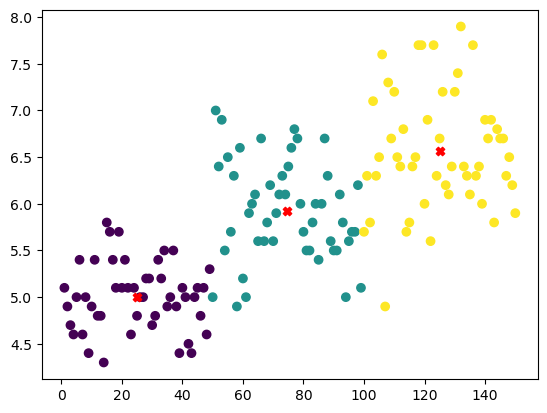

In [2]:
def kmeans(X, K, max_iters):
    # Use the first K data points as the initial centroids
    centroids = X[:K]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update the centroids based on the assigned points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # If the centroids did not change, stop iterating
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids
   

X=np.array(df.iloc[:,:-1].values)
labels,c=kmeans(X,3,200)
print(labels)
print(c)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(c[:,0],c[:,1],marker="X",color="red")
plt.show()

# Approach 2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 25.           5.00612245   3.42040816   1.46530612   0.24489796]
 [ 74.5          5.922        2.78         4.206        1.304     ]
 [125.           6.57058824   2.97058824   5.52352941   2.01176471]]


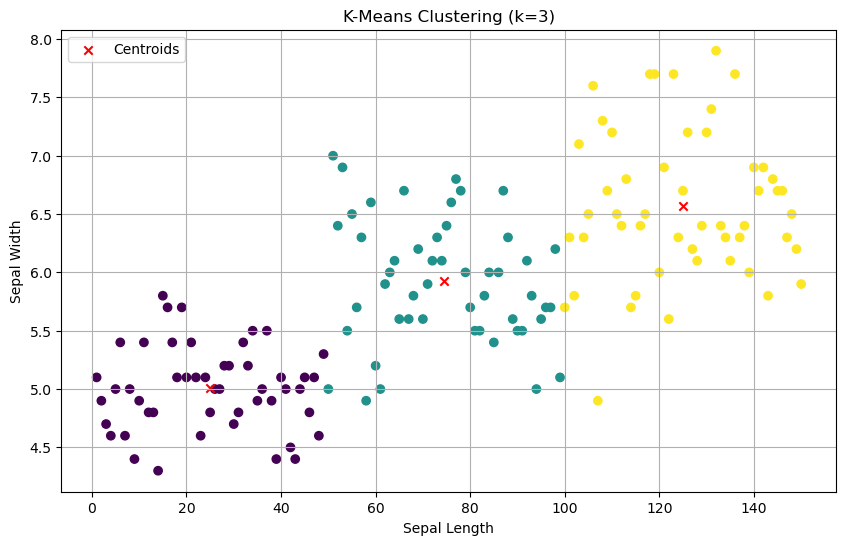

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Load the Iris dataset
data = pd.read_csv("./Iris.csv")

# Extract features and convert to numpy array
X = data.iloc[:, :-1].values

# K-Means Clustering
def kmeans(X, k, max_iters=100):
    
    centroids = X[:k]
    
    for _ in range(max_iters):
        # Compute distance from data points to centroids
        distances = cdist(X, centroids, 'euclidean')
        
        # Assign clusters
        labels = np.argmin(distances, axis=1)
        
        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Parameters
k = 3  # Number of clusters

# Run K-Means
centroids, labels = kmeans(X, k)

# Add cluster labels to the dataframe
data['Cluster'] = labels

print(labels)
print(centroids)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for the first two features
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.grid(True)
plt.show()
